<a href="https://colab.research.google.com/github/avinashbisht1410/supervised-learning-w-python/blob/master/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Example 1: Simple Linear Regression for Housing Dataset

We have a dataset which has one independent variable (area in square feet), and we have to predict the prices. It is again an example of simple linear regression, that is, we have one input variable.

Step 1: Import all the required libraries here:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

Step 2: Load the data set using pandas function:

In [2]:
house_df= pd.read_csv('House_data_LR.csv')

In [3]:
house_df.head()

,Unnamed: 0,sqft_living,price
0,0,1180,221900.0
1,1,2570,538000.0
2,2,770,180000.0
3,3,1960,604000.0
4,4,1680,510000.0


Step 3: Check if there is any null value present in the dataset:

In [4]:
house_df.isnull().any()

Unnamed: 0     False
sqft_living    False
price          False
dtype: bool

Step 4: There is a variable which does not make sense. We are dropping the variable “Unnamed”:

In [5]:
house_df.drop('Unnamed: 0', axis = 1, inplace = True)

Step 5: After dropping the variable, let’s have a look at the first few rows in the dataset:

In [6]:
house_df.head()

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


Step 6: We will now prepare the dataset for model building by separating the independent variable and target variable.

In [7]:
X = house_df.iloc[:, :1].values
y = house_df.iloc[:, -1].values

Step 7: The data is split into train and test now.

Train/Test Split: Creating a train and test dataset involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation of out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the data. It is more realistic for real-world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing. Here test data is 25% or 0.25.

NOTE: Random state, as the name suggests, is for initializing the internal random number generator, which in turn decides the splitting the train/test indices. Keeping it fixed allows us to replicate the same train/test split and hence in verification of the output.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

Step 8: Fit the data now using the linear regression model:

In [9]:
from sklearn.linear_model import LinearRegression
simple_lr= LinearRegression()
simple_lr.fit(X_train, y_train)

LinearRegression()

Step 9: The model is trained now. Let us use it to predict on the test data

In [10]:
y_pred = simple_lr.predict(X_test)

Step 10: We will first test the model on the training data. We will try to predict on training data and visualize the results on it.

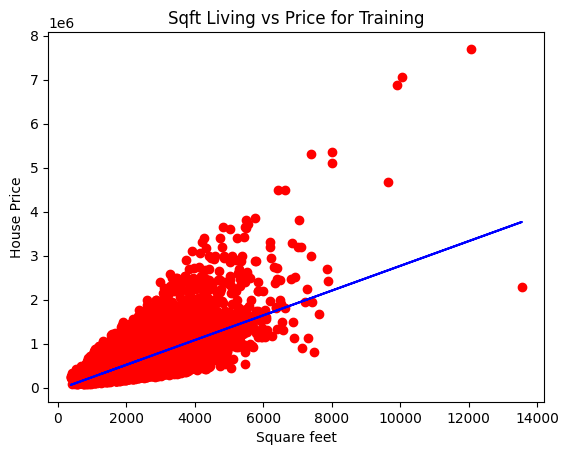

In [11]:
plt.scatter(X_train, y_train, color = 'r')
plt.plot(X_train, simple_lr.predict(X_train), color = 'b')
plt.title('Sqft Living vs Price for Training')
plt.xlabel('Square feet')
plt.ylabel('House Price')
plt.show()

Step 11: Now let us test the model on the testing data. It is the correct measurement to check how robust the model is.

Text(0, 0.5, 'House Price')

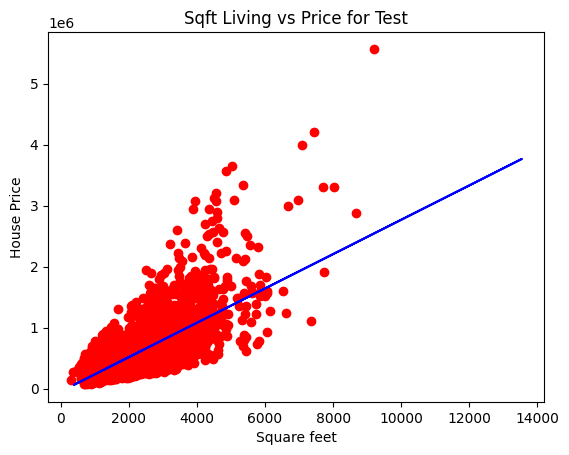

In [12]:
plt.scatter(X_test, y_test, color = 'r')
plt.plot(X_train, simple_lr.predict(X_train), color = 'b')
plt.title('Sqft Living vs Price for Test')
plt.xlabel('Square feet')
plt.ylabel('House Price')

Step 12: Now let’s figure out how good or how bad we are doing in the predictions. We will calculate the MSE and R2.

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - float(len(y)-1)/(len(y)-len(simple_lr.coef_)-1)*(1 - r2)
rmse, r2, adj_r2, simple_lr.coef_, simple_lr.intercept_

(257125.13804007217,
 0.5020612063135523,
 0.5020381653254589,
 array([281.4054356]),
 -45441.30813530844)

Step 13: We will now make a prediction on unseen value of x:

In [27]:
import numpy as np
x_unseen=np.array([1500]).reshape(1,1)
simple_lr.predict(x_unseen)


array([376666.84526037])

 In real-world problems, only one independent variable will almost never happen. Most business world problems have more than one variable, and such problems are solved using multiple linear regression algorithms